<a href="https://colab.research.google.com/github/thibaudchevrier/jedha_final_project/blob/main/data_prep_AK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

DATASET_PATH = "/content/drive/MyDrive/Final_project/datasets"

assert os.path.exists(DATASET_PATH), "Problem with registered path"
print("Path successfully verified !!!!")

Path successfully verified !!!!


In [ ]:
from pathlib import Path
import tarfile

# Unzip all tarfiles in datasets folder if not already unzipped
for tar_file in list(Path(DATASET_PATH).rglob("*.*gz")):
    tar_file = str(tar_file)
    if not os.path.exists(tar_file.split(".")[0]):
        destination_path, _ = os.path.split(tar_file)
        file = tarfile.open(tar_file, mode="r:gz")
        file.extractall(path=destination_path)
        file.close()

In [ ]:
!pip install kaggle

In [ ]:
!mkdir /root/.kaggle
!cp /content/drive/MyDrive/Final_project/datasets/kaggle.json /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
import time
import numpy as np 
import tensorflow as tf
import json
import matplotlib.pyplot as plt 
import pandas as pd
from IPython import display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Train data import


In [ ]:
!ls /content/drive/MyDrive/Final_project/datasets/imaterialist

label_descriptions.json  sample_submission.csv	test  train  train.csv


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Final_project/datasets/imaterialist/train.csv") 

In [ ]:
data.head()

,ImageId,EncodedPixels,Height,Width,ClassId,AttributesIds
0,00000663ed1ff0c4e0132b9b9ac53f6e,6068157 7 6073371 20 6078584 34 6083797 48 608...,5214,3676,6,"115,136,143,154,230,295,316,317"
1,00000663ed1ff0c4e0132b9b9ac53f6e,6323163 11 6328356 32 6333549 53 6338742 75 63...,5214,3676,0,"115,136,142,146,225,295,316,317"
2,00000663ed1ff0c4e0132b9b9ac53f6e,8521389 10 8526585 30 8531789 42 8537002 46 85...,5214,3676,28,163
3,00000663ed1ff0c4e0132b9b9ac53f6e,12903854 2 12909064 7 12914275 10 12919485 15 ...,5214,3676,31,"160,204"
4,00000663ed1ff0c4e0132b9b9ac53f6e,10837337 5 10842542 14 10847746 24 10852951 33...,5214,3676,32,219


In [ ]:
image_df = data.groupby('ImageId')['AttributesIds', 'ClassId'].agg(lambda x: list(x))
image_df.reset_index(inplace=True)
image_df['ImageId'] = image_df['ImageId'].astype('str')
print(image_df.head())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


                            ImageId  ...                            ClassId
0  00000663ed1ff0c4e0132b9b9ac53f6e  ...  [6, 0, 28, 31, 32, 32, 31, 29, 4]
1  0000fe7c9191fba733c8a69cfaf962b7  ...                            [33, 1]
2  0002ec21ddb8477e98b2cbb87ea2e269  ...                   [33, 10, 23, 23]
3  0002f5a0ebc162ecfb73e2c91e3b8f62  ...                       [10, 33, 15]
4  0004467156e47b0eb6de4aa6479cbd15  ...               [10, 33, 31, 31, 15]

[5 rows x 3 columns]


In [ ]:
names = ["shirt, blouse","top, t-shirt, sweatshirt","sweater","cardigan",
"jacket","vest","pants","shorts","skirt","coat","dress","jumpsuit","cape",
"glasses","hat","headband, head covering, hair accessory","tie","glove",
"watch","belt","leg warmer","tights, stockings","sock","shoe","bag, wallet",
"scarf","umbrella","hood","collar","lapel","epaulette","sleeve","pocket","neckline",
"buckle","zipper","applique","bead","bow","flower","fringe","ribbon","rivet","ruffle",
"sequin","tassel"]

Affiche valeurs uniques des IDclasses par Image:

In [ ]:
set_cls= []
for i in range(len(image_df)):
    classes = list(set(image_df['ClassId'].iloc[i]))
    set_cls.append(classes)
    
image_df['SetClassId'] = set_cls
image_df.drop(['AttributesIds','ClassId'],axis=1,inplace=True)

In [ ]:
image_df.head()

,ImageId,SetClassId
0,00000663ed1ff0c4e0132b9b9ac53f6e,"[0, 32, 4, 6, 28, 29, 31]"
1,0000fe7c9191fba733c8a69cfaf962b7,"[33, 1]"
2,0002ec21ddb8477e98b2cbb87ea2e269,"[33, 10, 23]"
3,0002f5a0ebc162ecfb73e2c91e3b8f62,"[33, 10, 15]"
4,0004467156e47b0eb6de4aa6479cbd15,"[33, 10, 15, 31]"


In [ ]:
image_df.describe()#45 milles images 

,ImageId,SetClassId
count,45623,45623
unique,45623,15275
top,18e3c4469bb9963ba84d36e75c553a87,"[33, 10, 23]"
freq,1,2136


**********


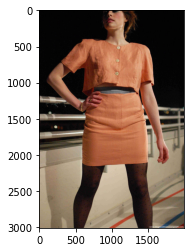

[0] shirt, blouse 
[1] neckline 
[2] skirt 
[3] belt 
[4] tights, stockings 
[5] sleeve 
**********
**********


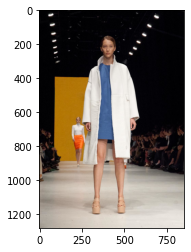

[0] pocket 
[1] neckline 
[2] coat 
[3] dress 
[4] shoe 
[5] collar 
[6] sleeve 
**********
**********


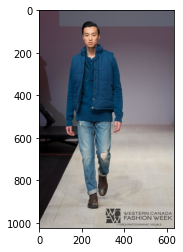

[0] neckline 
[1] sweater 
[2] top, t-shirt, sweatshirt 
[3] vest 
[4] pants 
[5] shoe 
[6] sleeve 
**********
**********


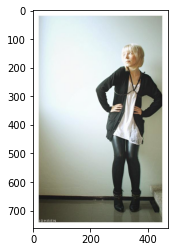

[0] pocket 
[1] top, t-shirt, sweatshirt 
[2] neckline 
[3] cardigan 
[4] pants 
[5] shoe 
[6] sleeve 
**********
**********


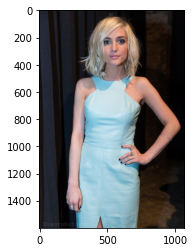

[0] neckline 
[1] dress 
**********
**********


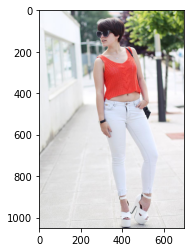

[0] pocket 
[1] top, t-shirt, sweatshirt 
[2] neckline 
[3] zipper 
[4] pants 
[5] rivet 
[6] glasses 
[7] watch 
[8] shoe 
[9] bag, wallet 
**********
**********


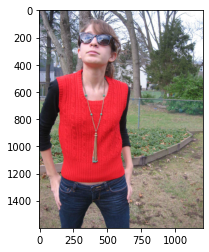

[0] pocket 
[1] neckline 
[2] sweater 
[3] top, t-shirt, sweatshirt 
[4] pants 
[5] rivet 
[6] glasses 
[7] sleeve 
**********
**********


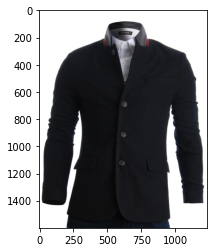

[0] pocket 
[1] shirt, blouse 
[2] jacket 
[3] collar 
[4] sleeve 
**********
**********


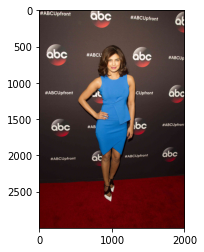

[0] neckline 
[1] dress 
[2] shoe 
**********
**********


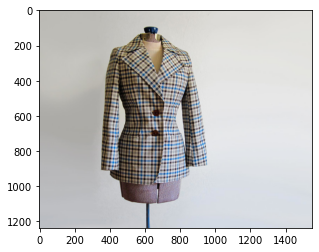

[0] top, t-shirt, sweatshirt 
[1] neckline 
[2] jacket 
[3] lapel 
[4] sleeve 
**********
**********


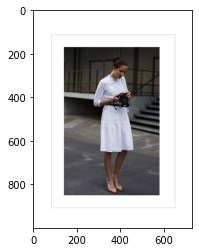

[0] neckline 
[1] buckle 
[2] dress 
[3] belt 
[4] shoe 
[5] bag, wallet 
[6] sleeve 
**********
**********


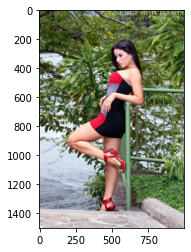

[0] neckline 
[1] dress 
[2] shoe 
**********
**********


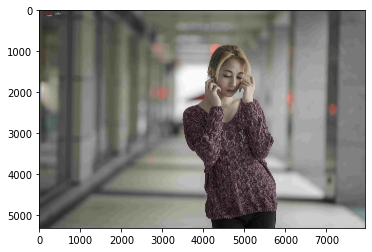

[0] neckline 
[1] sweater 
[2] sleeve 
**********
**********


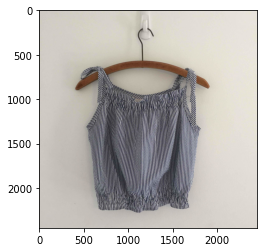

[0] top, t-shirt, sweatshirt 
[1] neckline 
**********
**********


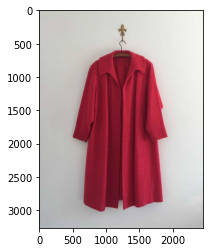

[0] pocket 
[1] coat 
[2] lapel 
[3] sleeve 
**********
**********


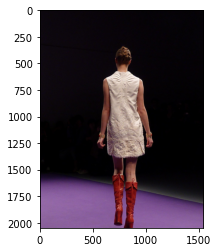

[0] neckline 
[1] dress 
[2] shoe 
**********
**********


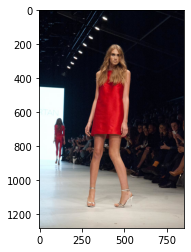

[0] neckline 
[1] dress 
[2] shoe 
**********
**********


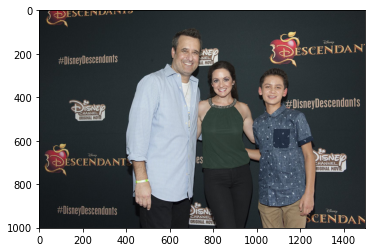

[0] shirt, blouse 
[1] top, t-shirt, sweatshirt 
[2] neckline 
[3] pants 
[4] collar 
[5] sleeve 
**********
**********


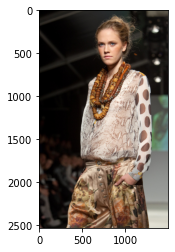

[0] pocket 
[1] top, t-shirt, sweatshirt 
[2] pants 
[3] sleeve 
**********
**********


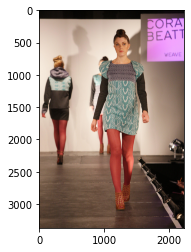

[0] neckline 
[1] dress 
[2] tights, stockings 
[3] shoe 
[4] sleeve 
**********
**********


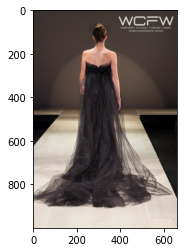

[0] neckline 
[1] dress 
**********
**********


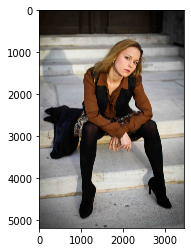

[0] shirt, blouse 
[1] vest 
[2] skirt 
[3] tights, stockings 
[4] shoe 
[5] collar 
[6] sleeve 
**********
**********


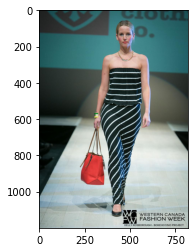

[0] top, t-shirt, sweatshirt 
[1] neckline 
[2] skirt 
[3] shoe 
[4] bag, wallet 
**********
**********


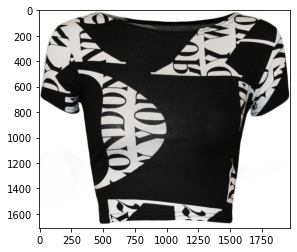

[0] top, t-shirt, sweatshirt 
[1] neckline 
[2] sleeve 
**********
**********


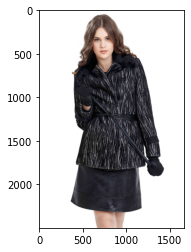

[0] skirt 
[1] coat 
[2] glove 
[3] belt 
[4] collar 
[5] sleeve 
**********


In [ ]:
for i in range(25):
    x = np.random.randint(0,len(image_df),size=(1,))[0]
    ID = image_df['ImageId'].iloc[x]
    classes = image_df['SetClassId'].iloc[x]
    print('*'*10)
    plt.imshow(mpimg.imread(f'/content/drive/MyDrive/Final_project/datasets/imaterialist/train/{ID}.jpg'))
    plt.show()
    for j in range(len(classes)):
        print('[{}] {} '.format(j,names[classes[j]]))
    print('*'*10)

# Label description import

In [ ]:
f = open('/content/drive/MyDrive/Final_project/datasets/imaterialist/label_descriptions.json',)

In [ ]:
label = json.load(f)

In [ ]:
for i in label['attributes']:
    print(i)

In [ ]:
f.close()